In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('pablet')

In [150]:
data= pd.read_csv('data.csv', skiprows=1, sep=',')
#SFR in log
#Flux in 10^-17 ergs/s/cm^2
#Luminosity distance in cm
mean= np.mean(data.BalmerD)
std= np.std(data.BalmerD)
print(mean, std)

4.596634193333332 1.20194486166944


132


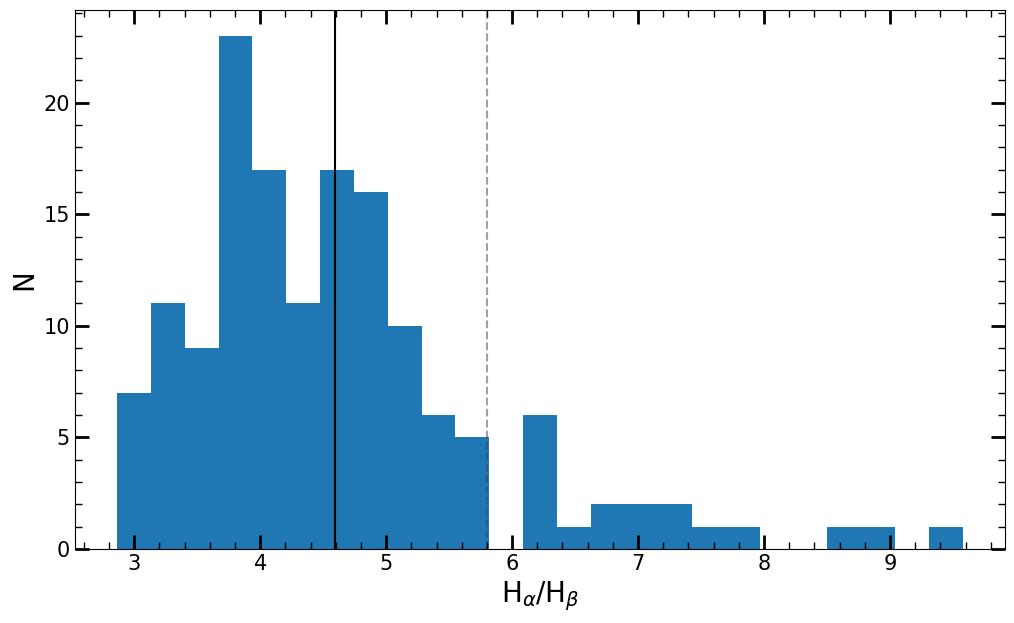

In [151]:
plt.hist(data.BalmerD, bins=25, zorder=0)
plt.axvline(mean, c='k', zorder=1)
plt.axvline(mean+std, c='#444444', ls='--', alpha=0.5, zorder=1)
plt.xlabel(r'H$_\alpha$/H$_\beta$')
plt.ylabel('N')

data= data[(data.BalmerD>2.86)*(data.BalmerD<mean+std)]
print(len(data))

In [152]:
k_alpha= 3.33
k_beta= 4.60

reddening= (2.5/(k_beta-k_alpha))*np.log10(data['BalmerD']/2.86)
H_alpha= (1e-17*data['Halpha']*(4*np.pi*data['LD']**2))*10**(0.4*k_alpha*reddening)

SFR= 8e-42*H_alpha

0      0.420645
1      0.277100
2      0.260029
3      0.250201
4      0.127791
         ...   
143    0.529432
144    0.454099
145    0.272623
146    0.118833
149    0.176589
Name: BalmerD, Length: 132, dtype: float64


In [148]:
df= pd.DataFrame({
    'SDSS': data['SFR'],
    'Estimated': np.log10(SFR)
})

print(df)

         SDSS  Estimated
0   -0.520650  -0.861504
1   -0.527342  -1.045183
2   -1.155230  -0.749329
3   -0.318228  -0.631363
4   -0.411009  -1.003943
..        ...        ...
143  0.332834   0.401848
144  0.422924   0.035589
145 -0.473879  -0.981260
146 -1.112839  -0.764074
149  0.988526   0.056753

[132 rows x 2 columns]


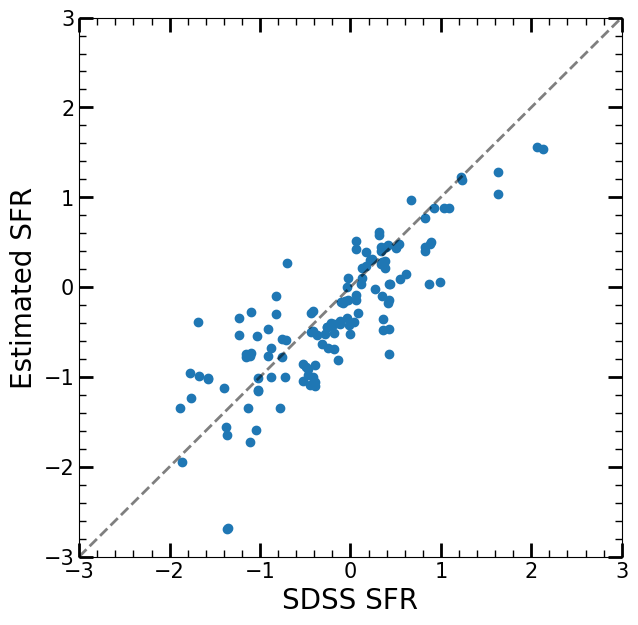

In [153]:
fig= plt.figure(figsize=(7,7))
plt.scatter(df['SDSS'], df['Estimated'])
plt.xlabel('SDSS SFR')
plt.ylabel('Estimated SFR')
plt.plot([-3,3],[-3,3],'k--',alpha=0.5,lw=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()